In [70]:
import pandas
import operator
import numpy
import matplotlib.pyplot as pyplot

In [71]:
# data = pandas.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-07-2022.csv')
data = pandas.read_csv('./cleaned.csv')

In [72]:
unique_countries =  list(data['Country_Region'].unique())

country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_incidence_rate = [] 
country_mortality_rate = [] 

no_cases = []
i = 0
while i < len(unique_countries):
    cases = data[data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(unique_countries[i])
    i += 1

i = 0
while i < len(no_cases):
    unique_countries.remove(no_cases[i])
    i += 1
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
i = 0
while i < len(unique_countries):
    country_confirmed_cases[i] = data[data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(data[data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(data[data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(data[data['Country_Region']==unique_countries[i]]['Active'].sum())
    country_incidence_rate.append(data[data['Country_Region']==unique_countries[i]]['Incident_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])
    i += 1

In [73]:
country_df = pandas.DataFrame({
    'Country': unique_countries, 
    'No. of Confirmed Cases': country_confirmed_cases,
    'No. of Deaths': country_death_cases, 
    'No. of Recoveries' : country_recovery_cases, 
    'No. of Active Cases' : country_active_cases, 
    'Incidence Rate' : country_incidence_rate,
    'Mortality Rate': country_mortality_rate
})

country_df.style.background_gradient(cmap='Greens')

,Country,No. of Confirmed Cases,No. of Deaths,No. of Recoveries,No. of Active Cases,Incidence Rate,Mortality Rate
0,US,81973661,997740,0.000000,0.000000,78759576.852138,0.012171
1,India,43107689,524103,0.000000,0.000000,193510.158771,0.012158
2,Brazil,30574245,664426,0.000000,0.000000,442127.342230,0.021732
3,France,29155815,147893,0.000000,0.000000,378364.440664,0.005073
4,Germany,25406868,136756,0.000000,0.000000,482644.049811,0.005383
5,United Kingdom,22318371,177072,0.000000,0.000000,444585.758757,0.007934
6,Russia,17966773,369451,0.000000,0.000000,1027278.020485,0.020563
7,"Korea, South",17614895,23462,0.000000,0.000000,34357.666671,0.001332
8,Italy,16816419,164573,0.000000,0.000000,583789.284669,0.009786
9,Turkey,15044921,98854,0.000000,0.000000,17838.614458,0.006571


In [74]:
def plot_bar_graphs(x, y, title):
    pyplot.figure(figsize=(16, 12))
    pyplot.barh(x, y)
    pyplot.title(title, size=20)
    pyplot.xticks(size=20)
    pyplot.yticks(size=20)
    pyplot.show()

def plot_pie_charts(x, y, title):
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    pyplot.figure(figsize=(20,15))
    pyplot.title(title, size=20)
    pyplot.pie(y, colors=c,shadow=True, labels=y)
    pyplot.legend(x, loc='best', fontsize=12)
    pyplot.show()

In [75]:
visual_unique_countries = [] 
visual_confirmed_cases = []
others = numpy.sum(country_confirmed_cases[10:])

i = 0
while i < len(country_confirmed_cases[:10]):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    i += 1
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

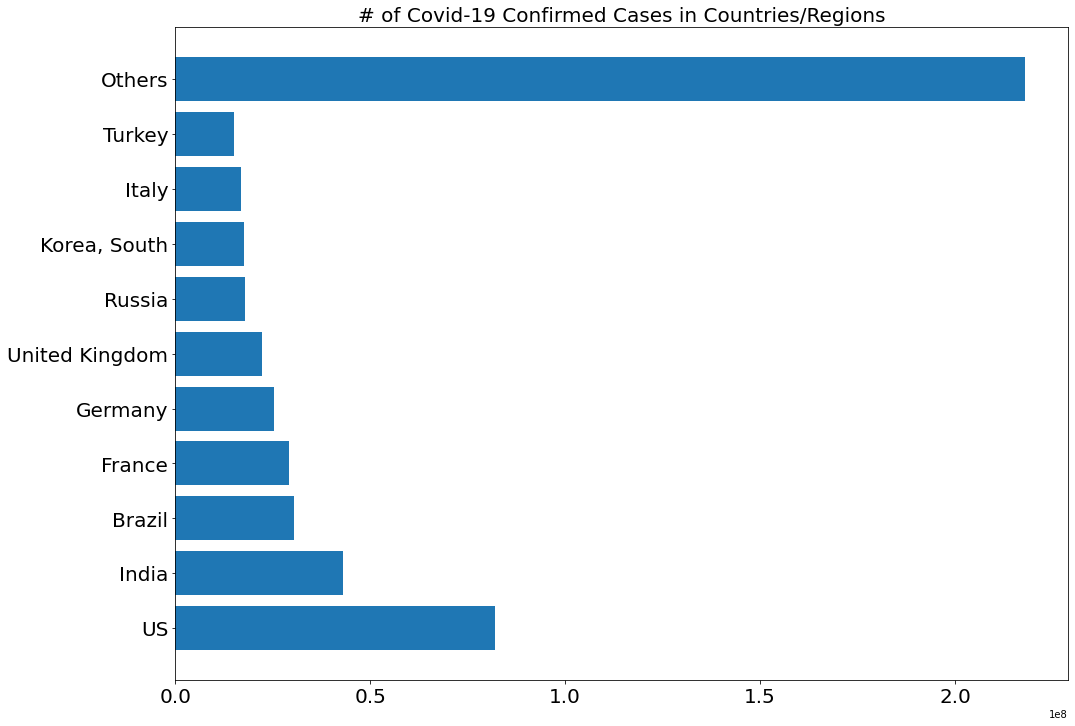

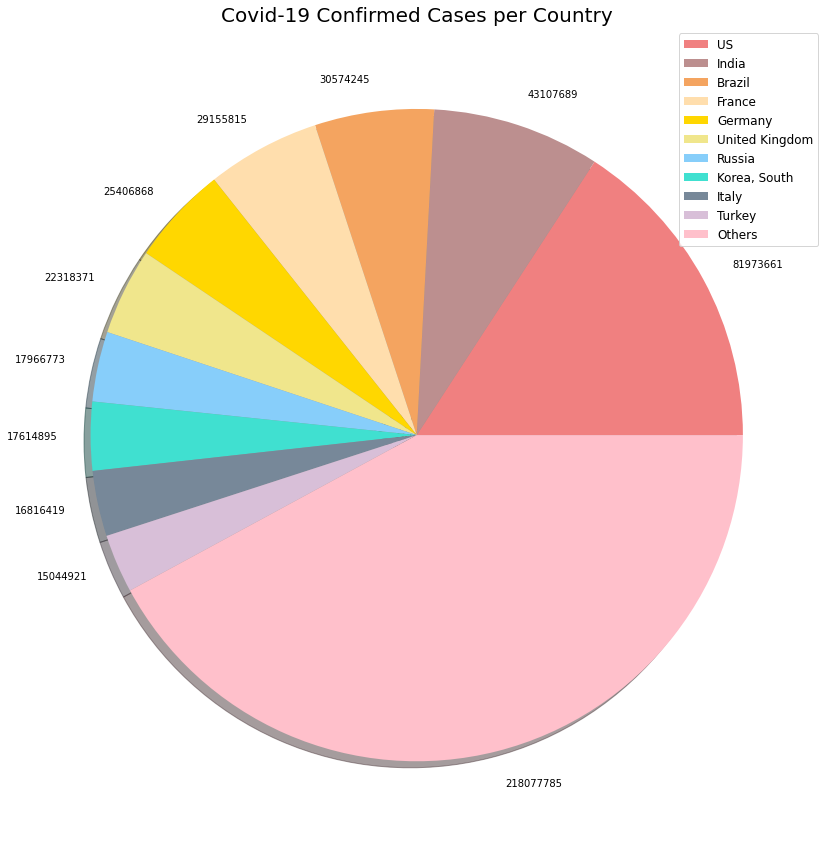

In [76]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')